# **Proyecto Sprint 6: Primer Proyecto Integrado**



# Inicio de proyecto:<a name='id1'></a>
# 1. Importacion de bibliotecas<a name='id2'></a>


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
import plotly_express as px 

# 2.- Trabajo y limpieza de datos<a name='id3'></a>

In [2]:
#importacion de archivo a trabajar 'games.csv' 
games_df = pd.read_csv('games.csv')
#Cambiando titulos de columnas a minusculas
games_df.columns = games_df.columns.str.lower()

#============== retrabajos columnas================
#trabajo columna 'name'
    #Cambiar los Nan a 'Unknown'
games_df['name'].fillna('Unknown', inplace= True)
        
##trabajo columna 'year of release'
    #cambiar tipo de datos a int en lugar de float. 
games_df['year_of_release'].fillna(0.0, inplace= True)
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

#trabajo columna 'genre'
games_df['genre'].fillna('Unknown', inplace= True)

#trabajo columna 'critic_score'
games_df['critic_score'].fillna(0.0, inplace=True)

#trabajo columna 'user_score' 
games_df['user_score'].fillna(0.0, inplace=True)


        #Tambien se va a cambiar el score TBD debido a que sigue en discusion, por lo tanto no tiene un score aun, por lo tanto es 0 para fines estadisticos
        #se hara una nota donde se explica que algunos user_score siguen en deliberacion para justificar ciertos numeros\
games_df['user_score'].replace('tbd', 0.0, inplace=True)
games_df['user_score'] = games_df['user_score'].astype(float)
        #tambien se multiplicara por 10 el user_score para que coincida con el formato de critic_score
games_df['user_score'] = games_df['user_score']*10


#trabajo columna 'rating' 
games_df['rating'].fillna('NR', inplace=True)

#Columna de ventas totales
games_df['total_sales'] = games_df['na_sales']+games_df['jp_sales']+games_df['eu_sales'] + games_df['other_sales']


#=============comprobacion datos despues de cambios =========#
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Los datos presentan problemas comunes, se cambiaron los Nan a 'Unkown' donde no habia genero establecido, podria ser por falta de clasificacion a la hora de agrupar la informacion. Se cambio a tipo 'Int' los datos de 'year_of_release'. Para las columnas de las calificaciones se cambio el termino 'tbd' a 0 usando como justificacion que si no tiene calificacion, significa, redundantemente que no ha sido calificado, entonces un 0 estadistico. los Nan's en la columna 'rating' se cambiaron a Not Rated por una razon similar. a su vez al user score se le mulitplico por x10 para igualar la denominacion de calificacion de critic score.

# 3.- Analisis de Datos 
    3.1 Cuantos juegos fueron lanzados en diferentes a;os, son significativos los datos de cada periodo? [1]
    3.2 Variacion de ventas de una plataforma a otra. variaciones por a;o por plataforma.
    3.3 Plataformas lideres en ventas
    3.4 Diagrama de Caja para ventas globales de todos los juegos por plataforma
    3.5 Grafico de dispersion y calcular las correlacion entre resenas y las ventas. saca conclusiones
    3.6 Generar grafico de ventas por genero y ver generos mas rentables
    

### 3.1 Juegos lanzados por a;o, se comprobara si hay alguna relacion entre la venta de de juegos y el a;o que fueron lanzados [1]

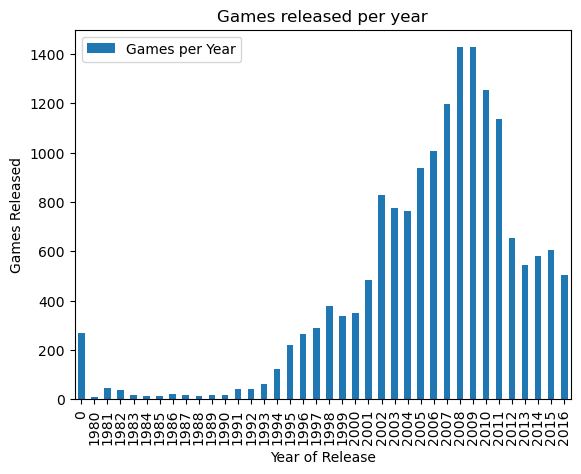

In [3]:
games_released_table = pd.pivot_table(games_df, index= 'year_of_release', values= 'name', aggfunc='count')
games_released_table.plot(kind='bar',xlabel='Year of Release',ylabel='Games Released',title='Games released per year')
plt.legend(['Games per Year'])

plt.show()

Conclusion inicial: Los a;os con mayor publicacion de juegos son del 2007 al 2011. los primeros a;os se podria deber a la cantidad de consolas que habia y la jugabilidad total de cada uno de los juegos publicados, antes se jugaban menos juegos con mayor competencia. En la actualidad nuevamente bajo la cantidad de consolas competidoras por lo que el numero de juego aumenta PERO en los a;os con mayores ventas podria ser resultado de lanzamiento de nuevas consolas que tuvieron que publicar mas juegos para la nueva generacion de equipamento, especificaciones y graficos. Esto se podria corroborar con la informacion de lanzamiento de las consolas respectivamente y comparar la publicaciones de juegos.

### 3.2 Variacion de ventas de entre plataformas.

#### 3.2.1 Ventas entre plataformas.

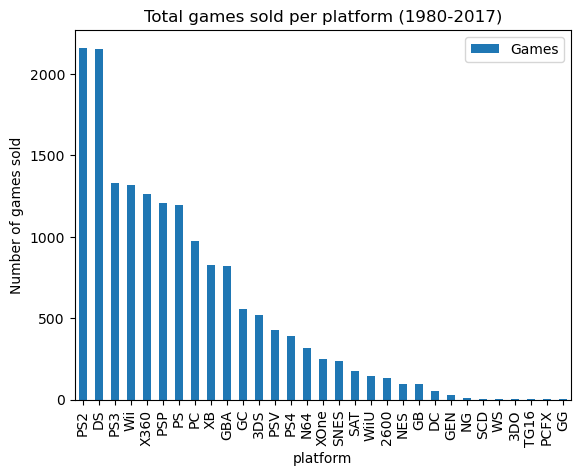

In [4]:
console_sales = games_df.groupby(['platform'])['total_sales'].count().reset_index().sort_values(by='total_sales', ascending=False)
sales_table = console_sales.plot(x='platform', y='total_sales', kind='bar', ylabel='Number of games sold',xlabel='platform', title='Total games sold per platform (1980-2017)')
plt.legend(['Games'])
plt.show()


Conclusion 2: La consola con la mayor venta de juegos fue la PlayStation 2 con mas de 2000 ventas de juegos, en un segundo lugar muy cercano se encuentra la Nintendo DS. Se tomaran en cuenta las plataformas dentro del top 5 para el analisis de ventas por a;o.

#### 3.2.2 Ventas de top 5 plataformas por a;o.

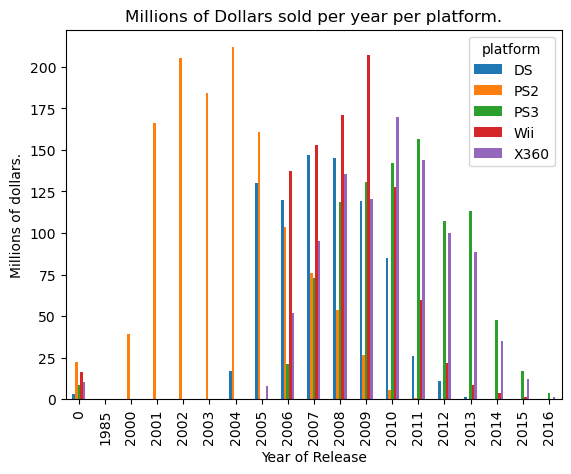

In [5]:
console_sales_per_year = games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
console_sales_per_year = console_sales_per_year[
    (console_sales_per_year['platform']=='PS2')|
    (console_sales_per_year['platform']=='DS')|
    (console_sales_per_year['platform']=='PS3')|
    (console_sales_per_year['platform']=='Wii')|
    (console_sales_per_year['platform']=='X360')
    ]

table_spy = pd.pivot_table(console_sales_per_year, index='year_of_release',values='total_sales', columns='platform', aggfunc='sum')
table_spy.plot(kind='bar',label='Millions of Dollars',xlabel='Year of Release',ylabel='Millions of dollars.', title='Millions of Dollars sold per year per platform.')
plt.show()


#### Conclusion 3.2.2: Este modelo nos deja ver que PS2 tuvo dominio en los primeros a;os de los 2000's. Lo que se puede apreciar de esta informacion es que todas las consolas tienen una curva de campana desde su despliegue, se traslapa con la salida del nuevo modelo de la compa;oa y procede a retirarse. se podria aplicar esta hipotesis viendo los a;os de salida que coincidan con el tiempo de vida de la consola para determinar que consola o compa;ia tendra las mayores ventas del 2017. Usando esta hipotesis rapidamente como ejemplo pude comprobar a traves de una busqueda de internet rapida que por ejemplo:

#### El Xbox360 empezo a decaer en ventas al rededor del 2011, por lo que Microsoft tuvo que haber encontrado su punto de vencimiento de esa consola e iniciaron la fabricacion de la siguiente, siendo esta el Xbox One, el cual fue lanzado en Noviembre del 2013. 
#### Misma hipotesis aplica para PlayStation, solo queda comprobarla matematicamente.


## 3.3 Tiempo de vida de las plataformas.
#### Observando los datos anteriores se puede deducir que el tiempo de vida de mercado de las plataformas depende directamente de las ventas. Si una plataforma no tiene buenas ventas, se descontinua la creacion de contenido para dicha consola y se inicia el dise;o del reemplazo. A esto tambien habria que tomar en cuenta las rese;as de usuarios de juegos.

## 3.4 Ventas globales de las plataformas principales

<Axes: xlabel='total_sales', ylabel='platform'>

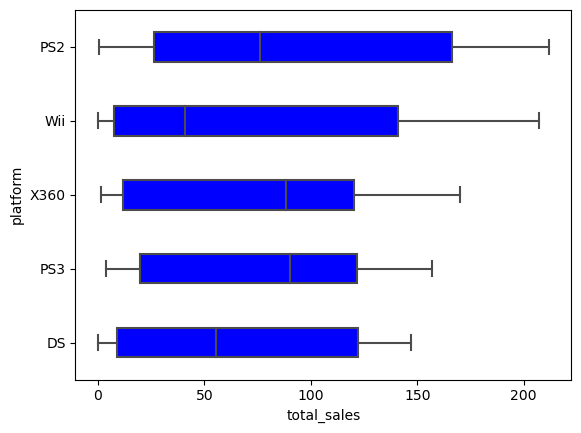

In [6]:
sns.boxplot(data=console_sales_per_year,saturation=1,color='blue',width=.4,y='platform',x='total_sales')

Conclusion 3.4 Las ventas promedio de cada plataforma varian bastante entre si. esto se podria deber a la cantidad de tiempo que estuvo la consola antes de que saliera la nueva consola, dicho caso no aplicaria entre PS2 Y PS3. Tambien podria explicarse debido al genero de juegos mas vendidos por cada consola dado que al menos en el Caso de Nintendo casi no se tienen juegos pesados y de multijugador de plataforma para 16 o mas jugadores en linea. Nintendo se especializa en juegos locales y de historia enfocado a la experiencia mas que al multijugador. Lo que podria suceder con Nintendo como marca es que veamos que iteraciones de juegos se hayan ido actualizando o remasterizando como clasicos.


## 3.5. Rese;as de usuarios y criticos.
Se buscara la correlacion entre las rese;as de usuarios con las ventas de la plataforma

,name,platform,total_sales,user_score,critic_score
17,Grand Theft Auto: San Andreas,PS2,20.81,90.0,95.0
24,Grand Theft Auto: Vice City,PS2,16.15,87.0,95.0
28,Gran Turismo 3: A-Spec,PS2,14.97,84.0,95.0
38,Grand Theft Auto III,PS2,13.10,85.0,97.0
48,Gran Turismo 4,PS2,11.65,85.0,89.0
...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,0.01,0.0,0.0
16671,Kanokon: Esuii,PS2,0.01,0.0,0.0
16683,Scarlett: Nichijou no Kyoukaisen,PS2,0.01,0.0,0.0
16689,Real Rode,PS2,0.01,0.0,0.0



La correlacion entre calificacion de criticos y total de ventas es 0.3007217189482493

La correlacion entre calificacion de usuarios y total de ventas es 0.262265688908458

La correlacion entre calificacion de usuarios y calificacion de usuarios es 0.8070200242104862


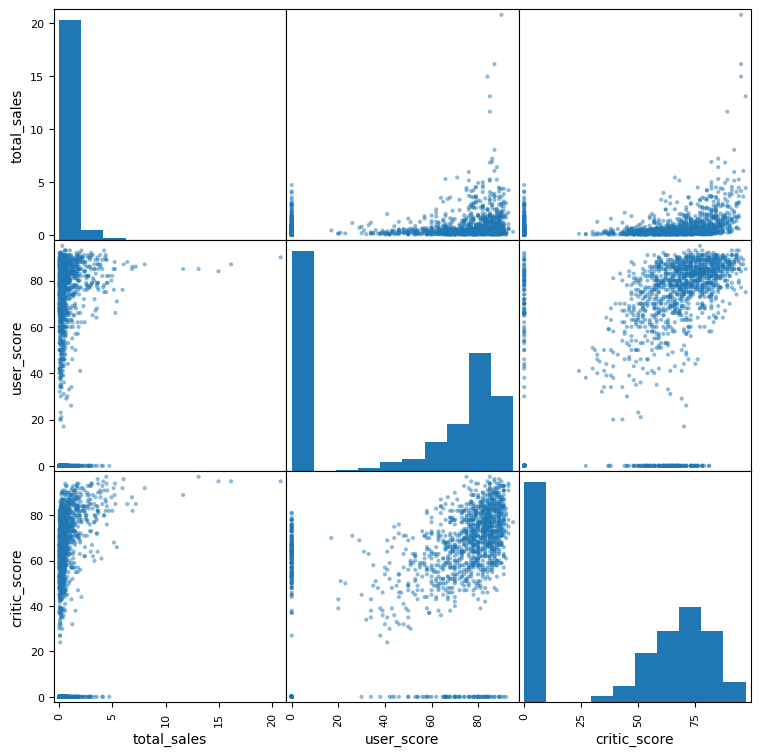

In [7]:
list1 = ['name','platform','total_sales','user_score','critic_score']
ps2_sales = games_df[list1]
ps2_sales = ps2_sales[(ps2_sales['platform']=='PS2')]
display(ps2_sales)
ps2_corr_1=ps2_sales['total_sales'].corr(ps2_sales['user_score'])
ps2_corr_2=ps2_sales['total_sales'].corr(ps2_sales['critic_score'])
ps2_corr_3=ps2_sales['user_score'].corr(ps2_sales['critic_score'])

print()
print(f'La correlacion entre calificacion de criticos y total de ventas es {ps2_corr_2}')
print()
print(f'La correlacion entre calificacion de usuarios y total de ventas es {ps2_corr_1}')
print()
print(f'La correlacion entre calificacion de usuarios y calificacion de usuarios es {ps2_corr_3}')
pd.plotting.scatter_matrix(ps2_sales,figsize=(9,9))
plt.show()

### La correlacion entre calificaciones y las ventas tienen una correlacion positiva mas no pareciese influenciar fuertemente las ventas. podria deberse a que no mucha gente califica los juegos. Si hay una correlacion directa entre las criticas de usuarios y criticos profesionales.

## 3.6 Distribucion de generos de juegos.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NR,0.01


,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


<Axes: title={'center': 'Most sold game genres'}, xlabel='Games Genres', ylabel='Total Sales(MM)'>

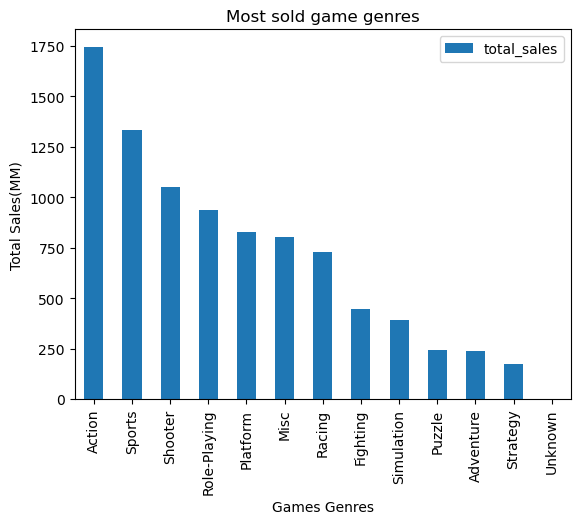

In [8]:
display(games_df)
games_genre = games_df.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False)
display(games_genre)

games_genre.plot(kind='bar', x='genre',y='total_sales',xlabel='Games Genres',ylabel='Total Sales(MM)', title='Most sold game genres')


Conclusion: El genero mas vendido de la base de datos es de Accion. esto podria deberse al creciente numero de juegos basados en historias donde se tienen multiples objetivos militares o de algun tipo de confrontacion donde el usuario logra sentirse representado por un personaje fuerte o una historia conmovedora. ultimamente las plataformas estan publicando juegos basados en multijugador competitivo donde se enfrentan con mas jugadores y tienen que superarse para completar partidas. Los juegos de estrategia son menos vendidos debido a la complicidad de rompecabezas y razonamiento necesario para avanzar. por lo general son juegos donde el objetivo se consigue tras varios escenarios donde se tienen que resolver acertijos, al contrario de juegos de accion donde son mas rapidas y se llega mas rapido al final.

# 4.0 Perfiles por region.

### 4.1. Region JP (Japon)

##### 4.1.1. Top 5 plataformas principales de juegos en Japon

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


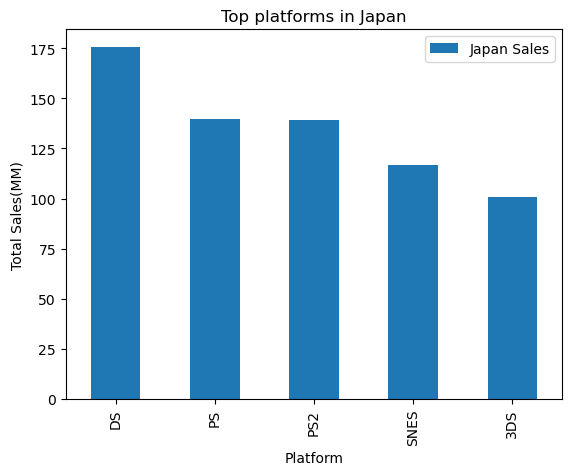

In [9]:
region_jp = games_df.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)
display(region_jp.head())

region_jp = region_jp.head()
region_jp.plot(kind='bar', x='platform',y='jp_sales',xlabel='Platform',ylabel='Total Sales(MM)', title='Top platforms in Japan')
plt.legend(['Japan Sales'])
plt.show()


La consola con mas venta fue el nintedo DS. Nintendo es bastante famoso en Japon debido a sus tematicas de fantasia y role-playing. esta podria ser una razon por la que de 5, 3 de las consolas son Nintendo.

#### 4.1.2 Top 5 generos de juegos en Japon

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


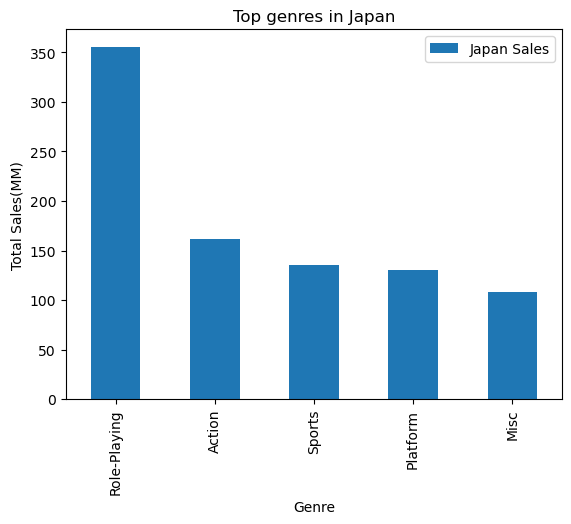

In [10]:
region_jp_genre = games_df.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)
display(region_jp_genre.head())

region_jp_genre = region_jp_genre.head()
region_jp_genre.plot(kind='bar', x='genre',y='jp_sales',xlabel='Genre',ylabel='Total Sales(MM)', title='Top genres in Japan')
plt.legend(['Japan Sales'])
plt.show()

### 4.2. Region NA (North America)

##### 4.2.1. Top 5 plataformas principales de juegos en North America

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


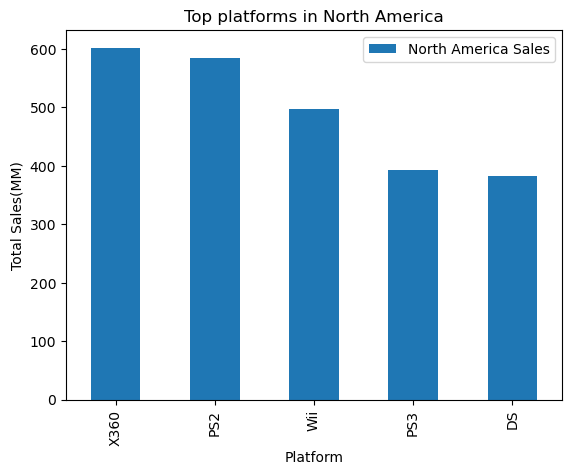

In [11]:
region_na = games_df.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
display(region_na.head())

region_na = region_na.head()
region_na.plot(kind='bar', x='platform',y='na_sales',xlabel='Platform',ylabel='Total Sales(MM)', title='Top platforms in North America')
plt.legend(['North America Sales'])
plt.show()

#### 4.2.2 Top 5 generos de juegos en North America

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


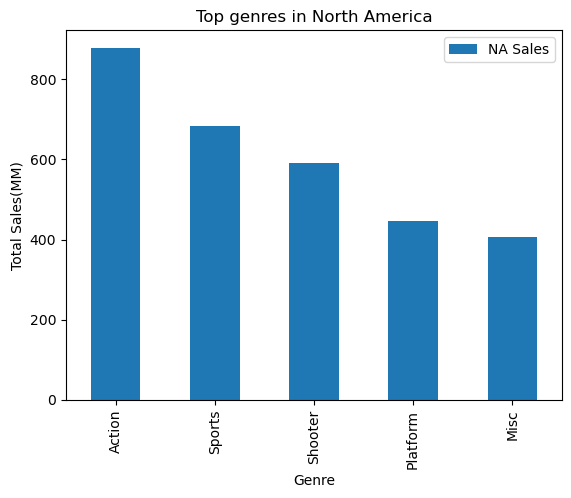

In [12]:
region_na_genre = games_df.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
display(region_na_genre.head())

region_na_genre = region_na_genre.head()
region_na_genre.plot(kind='bar', x='genre',y='na_sales',xlabel='Genre',ylabel='Total Sales(MM)', title='Top genres in North America')
plt.legend(['NA Sales'])
plt.show()

### 4.3. Region EU (European Union)

##### 4.3.1. Top 5 plataformas principales de juegos en EU

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


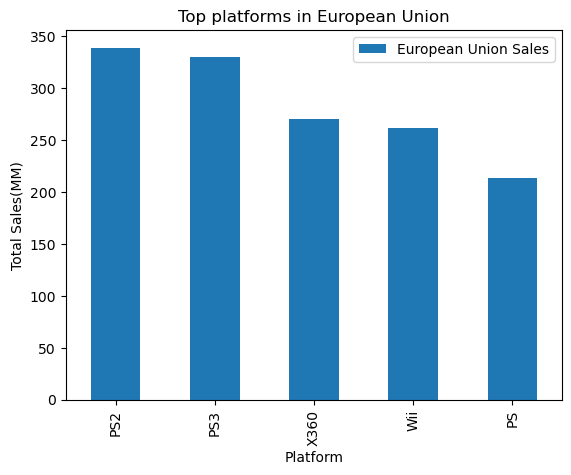

In [13]:
region_eu = games_df.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)
display(region_eu.head())

region_eu = region_eu.head()
region_eu.plot(kind='bar', x='platform',y='eu_sales',xlabel='Platform',ylabel='Total Sales(MM)', title='Top platforms in European Union')
plt.legend(['European Union Sales'])
plt.show()

#### 4.3.2 Top 5 generos de juegos en European Union

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


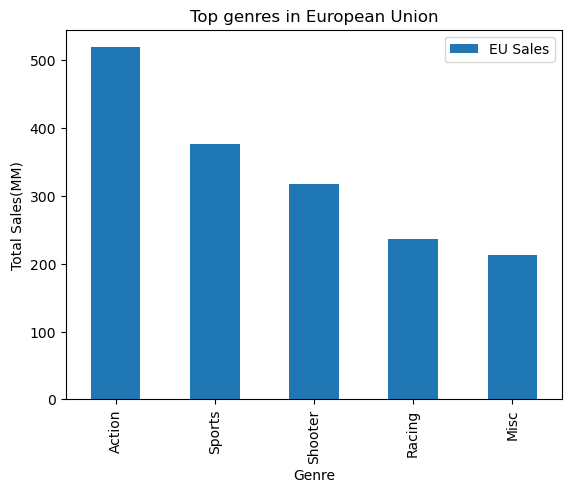

In [14]:
region_eu_genre = games_df.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)
display(region_eu_genre.head())

region_eu_genre = region_eu_genre.head()
region_eu_genre.plot(kind='bar', x='genre',y='eu_sales',xlabel='Genre',ylabel='Total Sales(MM)', title='Top genres in European Union')
plt.legend(['EU Sales'])
plt.show()

### 4.4 Clasificaciones por region.

,rating,jp_sales
6,NR,841.96
1,E,198.11
8,T,151.40
5,M,64.24
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
7,RP,0.00


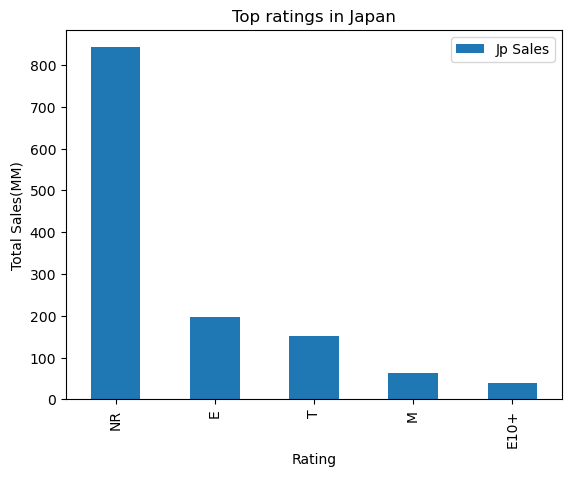

In [15]:
ratings_region_jp = games_df.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)
display(ratings_region_jp.head(10))


ratings_region_jp= ratings_region_jp.head()
ratings_region_jp.plot(kind='bar', x='rating',y='jp_sales',xlabel='Rating',ylabel='Total Sales(MM)', title='Top ratings in Japan')
plt.legend(['Jp Sales'])
plt.show()

,rating,na_sales
1,E,1292.99
6,NR,1242.46
8,T,759.75
5,M,748.48
2,E10+,353.32
4,K-A,2.56
3,EC,1.53
0,AO,1.26
7,RP,0.00


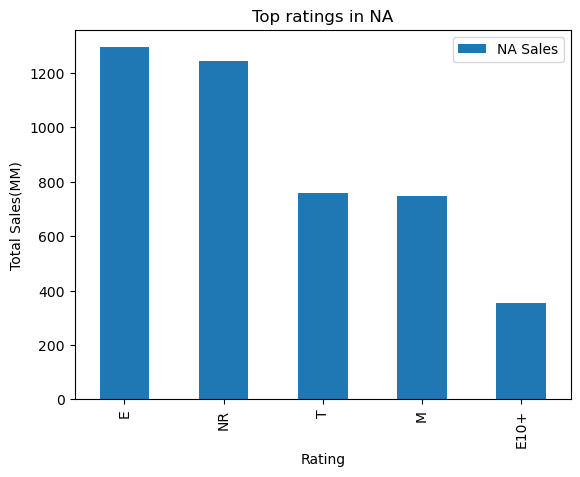

In [16]:
ratings_region_na = games_df.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
display(ratings_region_na.head(10))


ratings_region_na= ratings_region_na.head()
ratings_region_na.plot(kind='bar', x='rating',y='na_sales',xlabel='Rating',ylabel='Total Sales(MM)', title='Top ratings in NA')
plt.legend(['NA Sales'])
plt.show()

,rating,eu_sales
1,E,710.25
6,NR,613.83
5,M,483.97
8,T,427.03
2,E10+,188.52
0,AO,0.61
4,K-A,0.27
3,EC,0.11
7,RP,0.08


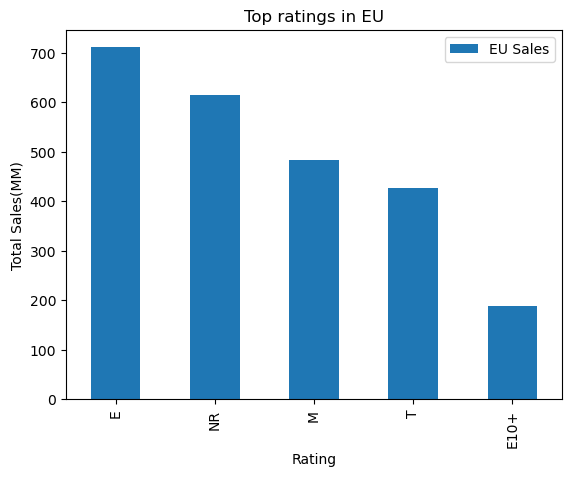

In [17]:
ratings_region_eu = games_df.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)
display(ratings_region_eu.head(10))


ratings_region_eu= ratings_region_eu.head()
ratings_region_eu.plot(kind='bar', x='rating',y='eu_sales',xlabel='Rating',ylabel='Total Sales(MM)', title='Top ratings in EU')
plt.legend(['EU Sales'])
plt.show()

### Conclusion punto 4:
#### Las ventas, generos y clasificaciones varian por region definitivamente. Factores principales podrian ser la cultura de cada una de ellas. 
### Japon
#### En Japon por ejemplo debido al tipo de sociedad los habitantes podrian buscar algun escape donde sus fantasias se cumplan de una u otra manera, siendo esto el porque Role-Playing viene siendo el genero mas vendido en la region y la clasificacion NotRated podria ser debido a que muchos juegos no necesitan algun tipo de limitante debido a sus historias y misiones. Japon es una sociedad muy apegados a una sexualidad abierta apoyando esto la creacion de juegos compatibles con plataformas famosas sin necesidad de clasificar el tipo de Role-Playing llevado a cabo en estos.
### North America
#### En esta region esta mas aceptada la violencia con armas de fuego debido a la misma vida que se vive en estos paises. muchos juegos son de tematica militar u operaciones secretas donde eres un soldado o una persona entrenada en algun tipo de especialidad de armas. Los juegos mas vendidos son multijugadores FPS (first person shooter) o 3PS (third person shooter) cumpliendo objetivos y eliminando a la competencia. el siguiente genero es deportes. NA es conocida por ser fanaticos principales deligas como MBLA, NBA, NFL, NHL y Soccer lo cual explicaria el genero Deportes.
### European Union
#### Al igual que NA, es una region que ha visto su cantidad de conflictos belicos facilitando la aceptacion cultural del genero de accion, incluso hasta cierto punto como herramienta de educacion historica, siendo este el caso de las primeras publicaciones de la franquicia Call Of Duty, situada en las primer y segunda guerra mundial. A su vez se sabe que la mayor liga de Soccer es en EU, siendo la cuna del soccer en varios niveles con personas siguiendo diferentes ligas contando hasta 211 ligas profesionales.

# 5. Prueba de Hipotesis


### 5.1 Las calificaciones de usuarios para las plataformas de Xbox One y Pc son las mismas.

In [18]:
pc_xone = games_df[(games_df['platform']=='XOne')|(games_df['platform']=='PC')]

display(pc_xone.sort_values(by='name',ascending=True).head(5))
filtered_1 = pc_xone[pc_xone['name'].duplicated(keep=False)==True]
display(filtered_1.sort_values(by='name'))
filtered_1.info()
xbox_score = filtered_1[(filtered_1['platform']== 'XOne')]
xbox_score_mean = xbox_score['user_score'].mean()
display(xbox_score_mean)
pc_score = filtered_1[(filtered_1['platform']== 'PC')]
pc_score_mean = pc_score['user_score'].mean()
display(pc_score_mean)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14658,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.0,0.00,70.0,63.0,T,0.02
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.0,0.00,63.0,58.0,NR,0.01
5925,1701 A.D.,PC,2006,Simulation,0.00,0.25,0.0,0.04,79.0,83.0,E10+,0.29
15288,18 Wheels of Steel: Extreme Trucker,PC,2009,Racing,0.00,0.02,0.0,0.00,0.0,80.0,NR,0.02
10003,18 Wheels of Steel: Extreme Trucker 2,PC,2011,Racing,0.08,0.02,0.0,0.01,0.0,83.0,E,0.11


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3909,Alien: Isolation,XOne,2014,Shooter,0.22,0.24,0.0,0.04,78.0,78.0,M,0.50
9035,Alien: Isolation,PC,2014,Shooter,0.00,0.14,0.0,0.01,81.0,84.0,M,0.15
721,Assassin's Creed IV: Black Flag,XOne,2013,Action,1.48,0.55,0.0,0.21,0.0,74.0,M,2.24
3130,Assassin's Creed IV: Black Flag,PC,2013,Action,0.22,0.38,0.0,0.05,84.0,77.0,M,0.65
1515,Assassin's Creed Syndicate,XOne,2015,Action,0.62,0.56,0.0,0.11,78.0,61.0,M,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...
2991,Wolfenstein: The New Order,XOne,2014,Shooter,0.34,0.28,0.0,0.06,79.0,78.0,M,0.68
8744,Wolfenstein: The Old Blood,XOne,2015,Action,0.07,0.07,0.0,0.01,75.0,80.0,NR,0.15
11145,Wolfenstein: The Old Blood,PC,2015,Action,0.00,0.08,0.0,0.00,76.0,76.0,M,0.08
13413,XCOM 2,XOne,2016,Strategy,0.02,0.02,0.0,0.00,87.0,81.0,T,0.04


<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 99 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             220 non-null    object 
 1   platform         220 non-null    object 
 2   year_of_release  220 non-null    int64  
 3   genre            220 non-null    object 
 4   na_sales         220 non-null    float64
 5   eu_sales         220 non-null    float64
 6   jp_sales         220 non-null    float64
 7   other_sales      220 non-null    float64
 8   critic_score     220 non-null    float64
 9   user_score       220 non-null    float64
 10  rating           220 non-null    object 
 11  total_sales      220 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 22.3+ KB


50.330275229357795

53.729729729729726

In [19]:
print('La hipotesis nula es que las calificaciones promedios de los usuarios para las plataformas Xbox One y PC son las mismas')

print()
print()
xbox_series = pd.Series(xbox_score['user_score'].values)
pc_series = pd.Series(pc_score['user_score'].values)
test = 53.72
alpha = 0.05
results = st.ttest_ind(xbox_series,pc_series,equal_var=False)
print('valor-p: ', results.pvalue)


if (results.pvalue < alpha):
    print('Rechazamos la hipotesis nula.')
else:
    print('No podemos rechazar la hipotesis nula.')

La hipotesis nula es que las calificaciones promedios de los usuarios para las plataformas Xbox One y PC son las mismas


valor-p:  0.39525223223872263
No podemos rechazar la hipotesis nula.


### 5.2 Las calificaciones promedio de usuarios para los generos de Accion y Deportes son diferentes.

In [20]:
sports_action = games_df[(games_df['genre']=='Action')|(games_df['genre']=='Sports')]
#display(sports_action.sort_values(by='user_score',ascending=False))

sport_score = sports_action[(sports_action['genre']== 'Sports')].head(100)
#display(sport_score)

action_score = sports_action[(sports_action['genre']== 'Action')].head(100)
#display(action_score)



In [21]:
print('La hipotesis nula es que las calificaciones promedio de los usuarios para los generos Accion y Deportes son diferentes')

print()
print()
sport_series = pd.Series(sport_score['user_score'].values)
action_series = pd.Series(action_score['user_score'].values)

test = action_series.mean()
alpha = 0.05
results = st.ttest_ind(sport_series,action_series,equal_var=False)
print('valor-p: ', results.pvalue)


if (results.pvalue < alpha) and (sport_series.mean() != action_series.mean()):
    print('Rechazamos la hipotesis nula.')
else:
    print('No podemos rechazar la hipotesis nula.')

La hipotesis nula es que las calificaciones promedio de los usuarios para los generos Accion y Deportes son diferentes


valor-p:  0.02969439091585926
Rechazamos la hipotesis nula.


## 5.0 Conclusion.

#### Se elaboraron 2 hipotesis para este proyecto.

#### #1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

#### #2: Las calificaciones promedio de los usuarios para los generos Accion y Deportes son diferentes.

 #1: Para hacer la prueba de hipotesis de calificaciones de usuarios para PC y Xbox One se filtraron primero una lista de juegos comprtidos entre ambas plataformas dado que no tendria sentido estadistico comparar digamos peras con una patineta. una vez filtrada la lista, se separaron en 2 series con una longitud de 110 filas cada una. una vez establecida la muestra estadistica, se procedio a comparar las medias de calificaciones dando como resultado que las calificaciones de usuarios entre Xbox One y PC tienen un 95% de parentezco, siendo rentable estos juegos en ambas plataformas.

 #2: Para la segunda prueba se hizo un filtrado similar tomando en cuenta unicamente los generos en cuestion. Una vez filtrados, se eligieron las top 100 calificaciones de cada genero, para comparar lo mejor calificado de ambos y evitar tener valores aleatorios muy bajos que afecten la hipotesis final. Tras la prueba se puede decir que la hipotesis nula fue rechazada y se debe considerar la hipotesis alternativa, siendo esta que las calificaciones de usuarios de estos generos tambien son bastante parecidas al menos en los 100 juegos mejor calificados de cada genero.

# CONCLUSION GENERAL DE PROYECTO INTEGRADO

Segun los datos analizados las ventas entre plataformas es una competencia constante donde la actualizacion tanto de hardware como de juegos van de la mano. Constantemente se tiene que estar analizando las ventas y calificaciones de usuarios para poder tomar decisiones tales como cuando iniciar la terminacion de una plataforma y empezar a dar vida a la siguiente para poder seguir siendo una marca rentable que los usuarios puedan seguir comprando y consumiendo. De la mano de estas consolas nuevas no tendria sentido vender el mismo juego para las consolas nuevas por lo que no tendria sentido comprar una segunda consola, por lo que secuelas y diferentes generos deben de ser publicados. Lo anterior es afectado directamente por la cultura, politicas y sentido de sociedad de la region en cuestion, por lo que se deben enfocar en mercados especificos de consumo para poder hacer juegos a la medida que se puedan vender bien en la mayoria, garantizando maxima gancia por cambio de consola.

Como se ve en los perfiles de cada region, los generos top varian asi como las calificaciones recibidas para cada genero/juego/consola. Tambien hay calificaciones de criticos profesionales pero ultimamente no son tan confiables debido a regalias pagadas por las compa;ias para apoyar en ventas. Si las calificaciones y ventas se ven afectadas, descontinuan soporte a ese equipo y se pueden enfocar recursos al siguiente para poder seguir a la cabeza de la competencia.

P.D. A quien revise:

Agradezco de antemano el tiempo invertido en esta revision. espero sea satisfactorio el proyecto y de ser el caso contrario espero con ansias los comentarios para poder corregirlo a la brevedad y continuar en este camino del Data Analysis.